In [23]:
import warnings
warnings.simplefilter("ignore")

from sktime.forecasting.compose import RecursiveTimeSeriesRegressionForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.arima import AutoARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sktime.utils.plotting import plot_series
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('../data/abinee/celulares.csv')

In [25]:
df = df.rename(columns={"Total":"populacao"})
df.index = pd.to_datetime(df.data)
df.index = df.index.to_period("M")
df.populacao = pd.to_numeric(df.populacao)
df = df.drop(columns={"data", "Tradicionais", "Smartphones"})
df

,populacao
data,
2022-01,3364855
2022-02,3317064
2022-03,3439025
2022-04,3253114
2022-05,3782137
2022-06,3383736
2022-07,2384326
2022-08,3491538
2022-09,3331511


<Axes: xlabel='data'>

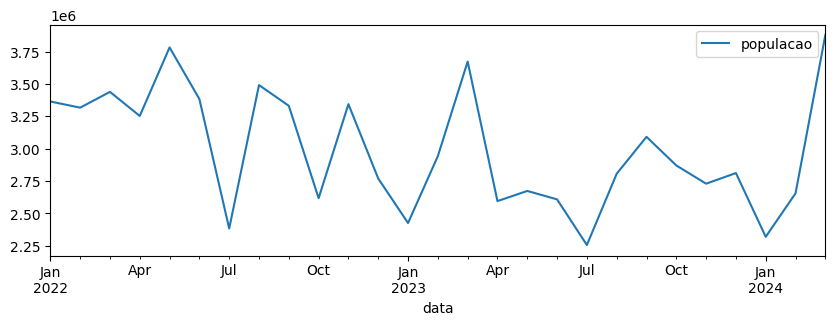

In [26]:
df.plot(figsize=(10,3))

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='populacao'>)

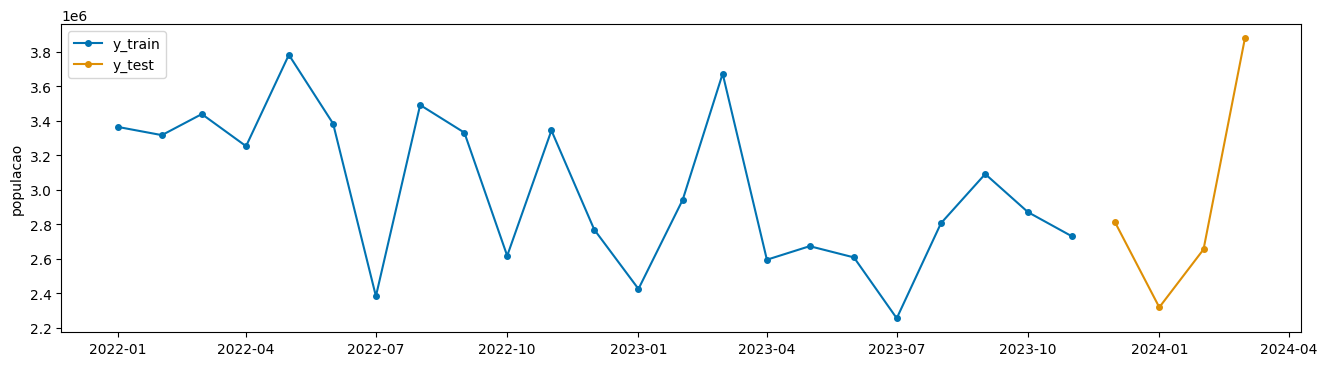

In [27]:
y_train = df['2022-01':'2023-11']
y_test = df['2023-12':]
fh = np.arange(len(y_test))+1
plot_series(y_train, y_test, labels=["y_train", "y_test"])

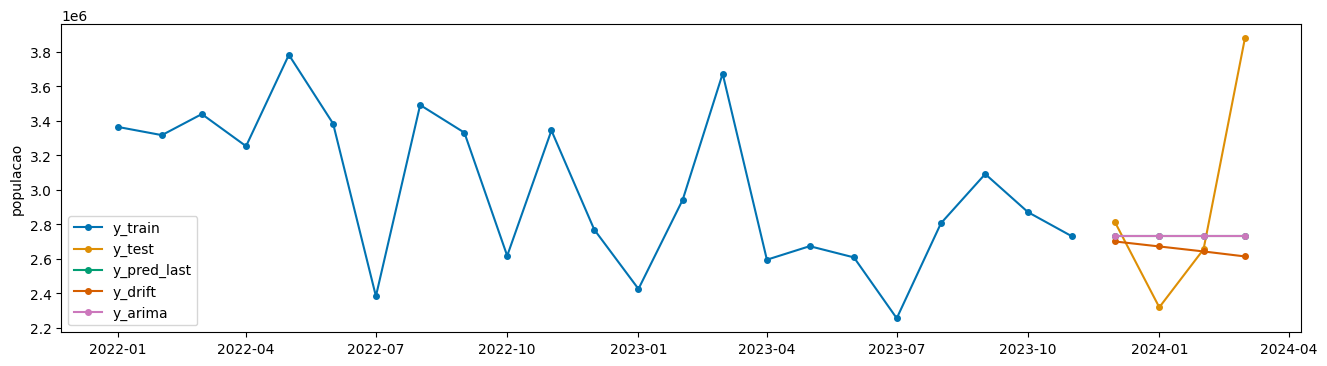

In [28]:
# Naive Forecaster com estratégia 'last'

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

# Naive Forecaster com estratégia 'drift' e sp=12

naive_forecaster_drift = NaiveForecaster(strategy="drift",sp=12)
naive_forecaster_drift.fit(y_train)
y_drift = naive_forecaster_drift.predict(fh)

# Arima

arima = AutoARIMA()
arima.fit(y_train)
y_arima = arima.predict(fh)

plot_series(y_train, y_test, y_last,y_drift, y_arima, labels=["y_train", "y_test", "y_pred_last","y_drift", "y_arima"]);

In [22]:
p = 0  # ordem do componente autoregressivo
d = 1  # ordem de diferenciação
q = 1  # ordem do componente de média móvel

# Modelo SARIMAX
model = SARIMAX(df['populacao'], order=(p, d, q), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)
sarima_y = model_fit.predict(fh)

ValueError: Value must be Period, string, integer, or datetime

In [19]:
nascimentos_predict=forecast_df['2024-01':'2024-12'].to_csv('predict_nascimentos.csv')

NameError: name 'forecast_df' is not defined